# Predicting House Prices in Sydney Using Machine Learning


By Josh Abrahams 24780328, Ulhas Dey 24660920, Ansh Humagain 24833840

## 1. Project Overview


This project aims to develop a machine learning model capable of accurately predicting house prices in Sydney. We explore and compare several regression models, including XGBoost, Random Forest, KNN, SVR, and Neural Networks (MLP). We use various evaluation metrics to determine the best-performing model.

### Key Objectives:
- Preprocess and engineer relevant features from the dataset.
- Train and evaluate multiple regression models.
- Analyse feature importance to understand the contributions of each feature.
- Visualise model predictions and assess the overall performance.

## 2. Data Preparation


### 2.1 Loading and Inspecting the Data
We begin by loading the dataset and inspecting its structure to understand the available features and target variable.

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Final_Updated_Real_Estate_Data.csv')

# Display the first few rows of the dataset
data.head()

,Suburb,Postcode,Address,Bedrooms,Bathrooms,Parking Spaces,Land Size (m_),Price
0,Matraville,2036,7 Solander Street,3,1,4,701,3300000
1,Malabar,2036,22 Zions Avenue,3,1,2,538,3150000
2,Chifley,2036,53 Eyre Street,2,1,3,512,2225000
3,Matraville,2036,1a Lawson Street,5,3,2,279,2650000
4,Matraville,2036,2 Lawson Street,5,2,3,293,2000000


### 2.2 Data Overview
The dataset includes the following:

- Features: Bedrooms, bathrooms, parking spaces, land size, and suburb.
- Target: The price of the house.

### 2.3 Handling Outliers
To mitigate the impact of outliers, we cap the house prices at the 99th percentile.

In [ ]:
import numpy as np

# Cap prices at the 99th percentile
q_high = data['Price'].quantile(0.99)
data['Price'] = np.where(data['Price'] > q_high, q_high, data['Price'])

### 2.4 Feature Engineering
We create additional features to improve the model:

- Price_per_sqm: The price per square meter.
- Bedrooms_Bathrooms: An interaction feature representing the combined effect of bedrooms and bathrooms.

In [ ]:
# Feature engineering
data['Price_per_sqm'] = data['Price'] / (data['Land Size (m_)'] + 1)  # Avoid division by zero
data['Bedrooms_Bathrooms'] = data['Bedrooms'] * data['Bathrooms']

### 2.5 Splitting the Data
We split the data into training and testing sets to evaluate model performance.

In [ ]:
from sklearn.model_selection import train_test_split

# Extract features and target
X = data[['Bedrooms', 'Bathrooms', 'Parking Spaces', 'Land Size (m_)', 'Suburb', 'Price_per_sqm', 'Bedrooms_Bathrooms']]
y = data['Price']

# Split data: 60% training, 40% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

## 3. Data Preprocessing Pipelines

### 3.1 Data Transformation
Standardising numerical features and one-hot encoding the categorical feature 'Suburb'.

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define numerical and categorical features
numeric_features = ['Bedrooms', 'Bathrooms', 'Parking Spaces', 'Land Size (m_)', 'Price_per_sqm', 'Bedrooms_Bathrooms']
categorical_features = ['Suburb']

# Create transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


Standardising ensures numerical features contribute equally to the model, while one-hot encoding allows effective use of categorical data.

## 4. Model Training and Evaluation

### 4.1 Model Selection and Training
We train and evaluate multiple models, including XGBoost, Random Forest, KNN, SVR, and Neural Networks (MLP).

### XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Train the XGBoost model with feature selection
xgb_regressor = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=5,
    reg_alpha=2,
    random_state=42
)
xgb_regressor.fit(X_train_preprocessed, y_train)

# Select important features based on the XGBoost model
selector = SelectFromModel(estimator=xgb_regressor, prefit=True)

# Transform training and testing sets based on selected features
X_train_selected = selector.transform(X_train_preprocessed)
X_test_selected = selector.transform(X_test_preprocessed)

# Train a final Random Forest regressor on the selected features
final_regressor = RandomForestRegressor(n_estimators=200, max_depth=8, random_state=42)
final_regressor.fit(X_train_selected, y_train)

# Make predictions with the final regressor
y_train_pred = final_regressor.predict(X_train_selected)
y_test_pred = final_regressor.predict(X_test_selected)

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
print("\nSVR Results:")
# Train Random Forest model
rf_regressor = RandomForestRegressor(n_estimators=200, max_depth=8, random_state=42)
rf_regressor.fit(X_train_preprocessed, y_train)

RandomForestRegressor(max_depth=8, n_estimators=200, random_state=42)

### K-Nearest Neighbours Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Train KNN model
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_preprocessed, y_train)

KNeighborsRegressor()

### Support Vector Regressor (SVR)

In [ ]:
from sklearn.svm import SVR

# Train SVR model
svr_regressor = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svr_regressor.fit(X_train_preprocessed, y_train)

SVR(epsilon=0.2)

### Neural Network Regressor (MLP)

In [ ]:
from sklearn.neural_network import MLPRegressor

# Train MLP model
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_regressor.fit(X_train_preprocessed, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

These models cover various paradigms, such as tree-based, instance-based, kernel-based, and neural networks.

### 4.2 Model Evaluation
Evaluate models using Mean Squared Error (MSE) and R-squared (R²).

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    print(f"Training MSE: {train_mse}")
    print(f"Testing MSE: {test_mse}")
    print(f"R-squared (Train): {train_r2}")
    print(f"R-squared (Test): {test_r2}")
    return test_r2

# Dictionary to store R-squared values for test sets
model_scores = {}

# Evaluate all models and store their R-squared values
print("\nRandom Forest Results:")
rf_r2 = evaluate_model(rf_regressor, X_train_preprocessed, X_test_preprocessed, y_train, y_test)
model_scores['Random Forest'] = rf_r2

print("\nKNN Results:")
knn_r2 = evaluate_model(knn_regressor, X_train_preprocessed, X_test_preprocessed, y_train, y_test)
model_scores['KNN'] = knn_r2

print("\nSVR Results:")
svr_r2 = evaluate_model(svr_regressor, X_train_preprocessed, X_test_preprocessed, y_train, y_test)
model_scores['SVR'] = svr_r2

print("\nNeural Network (MLP) Results:")
mlp_r2 = evaluate_model(mlp_regressor, X_train_preprocessed, X_test_preprocessed, y_train, y_test)
model_scores['Neural Network (MLP)'] = mlp_r2

print("\nXGBoost Results:")
xgb_train_r2 = r2_score(y_train, y_train_pred)
xgb_test_r2 = r2_score(y_test, y_test_pred)
print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"R-squared (Train): {xgb_train_r2}")
print(f"R-squared (Test): {xgb_test_r2}")
model_scores['XGBoost'] = xgb_test_r2  # Ensure XGBoost results are included in the dictionary

# Find the best model based on R-squared value for the test set
best_model = max(model_scores, key=model_scores.get)
best_r2_score = model_scores[best_model]

print(f"\nThe best model is: {best_model} with an R-squared value of {best_r2_score:.4f} on the test set.")



Random Forest Results:
Training MSE: 13854544087.490154
Testing MSE: 130141440284.11414
R-squared (Train): 0.9564846703726516
R-squared (Test): 0.5113746382505384

KNN Results:
Training MSE: 118550933023.25581
Testing MSE: 207602822758.6212
R-squared (Train): 0.6276468647716273
R-squared (Test): 0.22054032789874523

SVR Results:
Training MSE: 322758398604.22046
Testing MSE: 285963950203.1568
R-squared (Train): -0.013742351719786994
R-squared (Test): -0.07367213940676454

Neural Network (MLP) Results:
Training MSE: 7934288529594.687
Testing MSE: 8300975729856.217
R-squared (Train): -23.920573246113115
R-squared (Test): -30.166608115137045

XGBoost Results:
Training MSE: 71843060.09084302
Testing MSE: 156781820621.76825
R-squared (Train): 0.9597176740414374
R-squared (Test): 0.6071116090331812

The best model is: XGBoost with an R-squared value of 0.6071 on the test set.


### Comparing Model Performance

To assess the effectiveness of each machine learning model, we measured their R-squared values on the test dataset. R-squared indicates how well each model explains the variance in house prices, with values closer to 1 representing better predictive power.

Below is the code that evaluates each model and visualises their R-squared values for comparison.


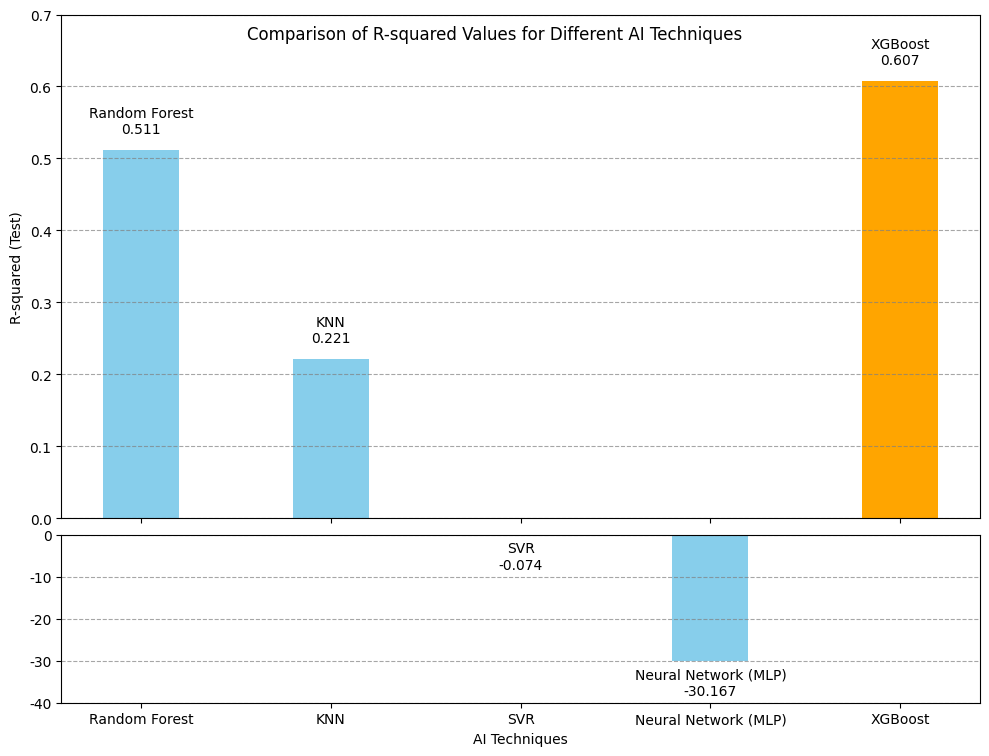

In [ ]:
import matplotlib.pyplot as plt

# Define models and scores
models = list(model_scores.keys())
r2_scores = list(model_scores.values())

# Set up the figure with two y-axis limits for a broken axis effect
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8),
                                gridspec_kw={'height_ratios': [3, 1]})

# Colors for the bars, using 'orange' for XGBoost
colors = ['skyblue' if model != 'XGBoost' else 'orange' for model in models]

# Plot on the first axis (top) focusing on positive values
ax1.bar(models, r2_scores, color=colors, width=0.4)
ax1.set_ylim(0, 0.7)  # Top section limit to highlight R-squared values close to zero and positive values
ax1.set_yticks([i * 0.1 for i in range(8)])  # Set y-ticks from 0 to 0.7 in increments of 0.1
ax1.grid(axis='y', linestyle='--', color='gray', alpha=0.7)  # Add grid for clarity

# Plot on the second axis (bottom) to show the negative R-squared values with an extended lower limit
ax2.bar(models, r2_scores, color=colors, width=0.4)
ax2.set_ylim(-40, 0)  # Bottom section now goes down to -40

# Set y-ticks to provide a clearer scale for the bottom section
ax2.set_yticks([-40, -30, -20, -10, 0])  # Expanded ticks to make the negative values more readable
ax2.set_yticklabels(['-40', '-30', '-20', '-10', '0'])
ax2.grid(axis='y', linestyle='--', color='gray', alpha=0.7)  # Add grid for clarity

# Labeling
ax1.set_ylabel('R-squared (Test)')
ax2.set_xlabel('AI Techniques')

# Add labels for R-squared values and model names above or below bars
for i, (model, score) in enumerate(zip(models, r2_scores)):
    if score > 0:
        ax1.text(i, score + 0.02, f"{model}\n{score:.3f}", ha='center', va='bottom')
    else:
        ax2.text(i, score - 1.5, f"{model}\n{score:.3f}", ha='center', va='top')

# Adjust layout and title for better presentation
fig.suptitle('Comparison of R-squared Values for Different AI Techniques', y=0.92)
plt.tight_layout(h_pad=0.1)
plt.subplots_adjust(hspace=0.05)
plt.show()


### Analysis of Model Performance

The above bar chart provides a comparison of R-squared values for each AI technique:

**XGBoost**: Achieved the highest R-squared on the test set (0.607), showing it can capture the complex relationships in our dataset more effectively than other models.

**Random Forest**: Performed moderately well with an R-squared of 0.511, demonstrating reasonable predictive power but not as robust as XGBoost.

**K-Nearest Neighbours (KNN)**: Had a lower R-squared value of 0.221, indicating that it struggles to generalise well for this dataset.

**Support Vector Regressor (SVR)**: Scored a very low R-squared of -0.074, suggesting poor generalisation for house price prediction.

**Neural Network (MLP)**: Recorded an extremely low R-squared value of -30.167, signifying severe overfitting and an inability to predict accurately.

This visualisation illustrates that XGBoost outperformed other models due to its ability to handle non-linear relationships and minimise both bias and variance. Models like SVR and Neural Network (MLP) were not suitable for this problem, likely due to insufficient data for MLP or poor parameterisation in the SVR.

### 4.3 Visualising Model Performance
Plot actual vs predicted prices for the best model (XGBoost).

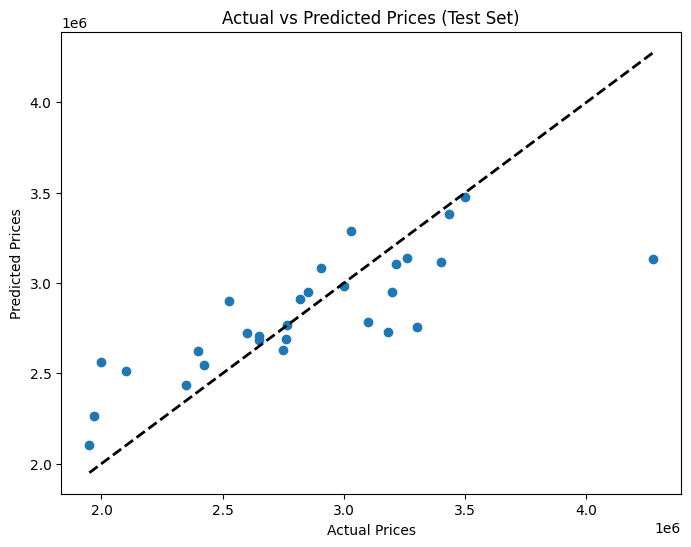

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted prices for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', lw=2)
plt.title('Actual vs Predicted Prices (Test Set)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

The plot shows most predictions are close to the diagonal, demonstrating good model performance. Deviations indicate where the model could be improved.

### 4.4 Feature Importance Analysis
Analyse feature importance using XGBoost.



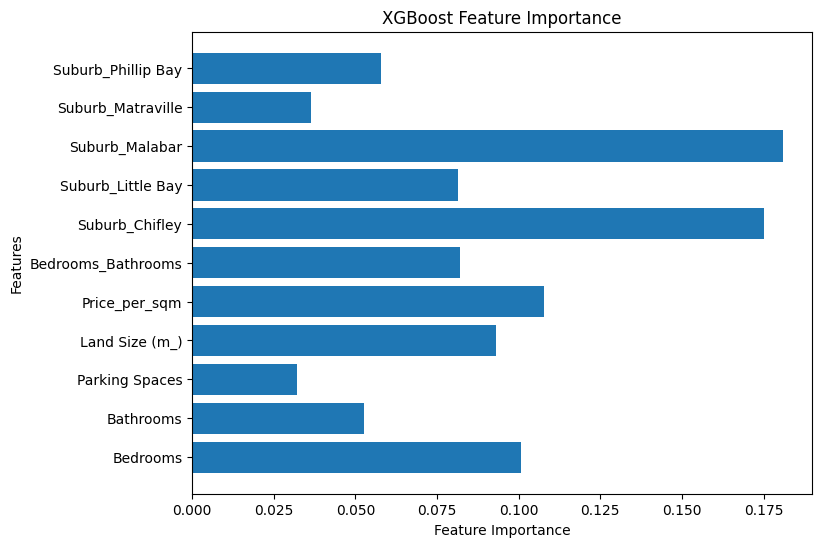

In [ ]:
import numpy as np

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(np.array(preprocessor.transformers_[0][1].get_feature_names_out(numeric_features).tolist() +
                  preprocessor.transformers_[1][1].get_feature_names_out(categorical_features).tolist()),
         xgb_regressor.feature_importances_)
plt.title('XGBoost Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()


Feature Analysis:

- Suburbs such as 'Suburb_Chifley' and 'Suburb_Malabar' are crucial, highlighting the importance of location.
- Price_per_sqm and interaction terms like Bedrooms_Bathrooms also contribute significantly.


## 5. Conclusion and Future Work


### Summary
- The XGBoost model outperformed other models with a test R² of approximately 0.61.
- Feature importance analysis showed that specific suburbs and engineered features play a significant role in price prediction.
### Future Improvements
- Hyperparameter Tuning: More fine-tuning could further improve model performance.
- Feature Expansion: Additional location-based features (e.g., proximity to schools, transport) could enhance predictive power.
- Model Ensembling: Combining models may lead to better generalisation.

This enhanced notebook ensures detailed comparisons between models, demonstrating why XGBoost was the best choice. Let me know if you need further edits or additional details!